In [3]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# load MATLAB files
from scipy.io import loadmat
from scipy.optimize import minimize

from sklearn.linear_model import LogisticRegression

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [5]:
data = loadmat('data/ex3data1.mat')
print data.keys()
# data['X'].shape
# data['y'].shape

y = data['y']
# Add constant for intercept
X = np.c_[np.ones((data['X'].shape[0],1)), data['X']]

print('X.shape: {}'.format(X.shape))
print('y.shape: {}'.format(y.shape))

['y', 'X', '__version__', '__header__', '__globals__']
X.shape: (5000, 401)
y.shape: (5000, 1)


(30, 400)
(20, 600)


(-0.5, 599.5, 19.5, -0.5)

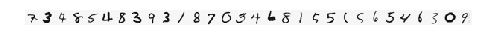

In [6]:
sample = np.random.choice(X.shape[0], 30)
# sample
print X[sample,1:].shape
# plt.imshow(X[sample,1:])
# print type(X[sample,1:])
print X[sample,1:].reshape(-1,20).T.shape   #这里的20要理解，因为图片是20*20的
plt.imshow(X[sample,1:].reshape(-1,20).T)
# plt.imshow(X[1,1:].reshape(-1,1).T)
plt.axis('off')
# print X[sample,1:].reshape(-1,20).shape

In [7]:
def sigmoid(z):
    return(1.0 / (1 + np.exp(-z)))


H向量化推导
<img src="pic/exe3/vectorize_h.jpg" width=50% height=50%>
Cost fun推导及向量化表示
<img src="pic/exe3/vectorize_J.jpg" width=50% height=50%>
<img src="pic/exe3/onlne_vectorize_J.png" width=75% height=75%>

In [8]:
def cost_function_reg(theta, reg, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1.0/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])


梯度的推导及正则化
<img src="pic/exe3/vectorize_gradient.jpg" width=50% height=50%>

In [9]:
def gradient_reg(theta, reg, X,y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
#     h = sigmoid(X.dot(theta))
    grad = (1.0/m)*X.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())


In [10]:
def one_vs_all(reg, X,y, classes) :
    #10x401,没一行表示一个classes的theata值，因为res.x返回是1*n的
    all_theta = np.zeros((classes, X.shape[1]))
    # 每一个class训练时候的初始化theta,401x1,图片像素是20*20，每个像素点都看做一个特征
    initial_theta = np.zeros(X.shape[1])
    # 已经把0映射为10了
    for c in np.arange(1, classes+1):
        # y == c：y的值需要重新设置,和class相等就位1,否则就为0
        res = minimize(cost_function_reg, initial_theta, args=(reg, X, (y == c)*1), method=None,
                       jac=gradient_reg, options={'maxiter':50})
        all_theta[c-1] = res.x
    return all_theta

theta = one_vs_all(0.1, X, y, 10)
# theta

In [11]:
def predict(all_theta, X, y) :
    """
    all_theta: 10*401
    X: 5000*401
    y: 5000*1
    """
    # predict_y: 5000*1 一维数组,对每一个样本进行的预测
    # np.argmax返回最大数的下标，axis没行
    predict_y = np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)+1
    print 'the accuracy is {}%'.format(np.mean(predict_y==y.ravel())*100)
    
    
predict(theta, X, y)

the accuracy is 93.24%


Nerual network

In [13]:
weights = loadmat('data/ex3weights.mat')
weights.keys()
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']
print 'Theta1.shape : ',weights['Theta1'].shape
print 'Theta2.shape : ',weights['Theta2'].shape
print 'X.shape : ',X.shape
print 'y.shape : ',y.shape

print Theta1[0,0:10]

Theta1 weights :  (25, 401)
Theta2 wgights :  (10, 26)
X wgights :  (5000, 401)
y wgights :  (5000, 1)
[ -2.25623899e-02  -1.05624163e-08   2.19414684e-09  -6.92223359e-06
   8.88278871e-05  -2.42735628e-04  -2.70957302e-03   1.45757191e-03
   2.46026364e-03   7.13629532e-04]


<img src="pic/exe3/neural_network.png" width=40% height=40%>

In [17]:
def nerual_network_predict(X, y, Theta1, Theta2) :
    """
    Theta1 (25, 401)
    Theta2 (10, 26)
    """
    
    # 401 * 5000
    a_1 = X.T
    
    # z_2: 25 * 5000
    z_2 = Theta1.dot(X.T)
    # a_2: 26 * 5000
    a_2 = np.c_[np.ones((X.shape[0],1)), sigmoid(z_2).T].T
    
    # z_3: 10 * 5000
    z_3 = Theta2.dot(a_2)
    # a_3: 10 * 5000
    a_3 = sigmoid(z_3)
    
    predict = np.argmax(a_3, axis=0)+1
    
    print 'accuracy is {}%'.format(np.mean(predict == y.ravel())*100)
    
nerual_network_predict(X,y,Theta1,Theta2)  
    

accuracy is 97.52%
